# Day 2 | linear Regression (Multiple Linear regression and simple linear regression) 

#### 線性回歸是一個非常簡單，且在預測量化數據時是一個非常好的工具，雖然相較其他機器學習的模型與工具似乎較為簡單，但是它還是一個廣為被使用的方法。因此在學習其他更複雜的模型之前，先由線性回歸學起是最好不過了
簡單線性回歸：

$ y=b_0+b_1*x $

多元線性回歸

$ y=b_0+b_1*x_1+b_2*x_2+b_3*x_3 $


這裡也整理一些有關線性迴歸的資源連結：
1. 目前最火的100 days ML code 挑戰 Avik-Jain：[link](https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/)
2. 李宏毅老師youtube: [ML Lecture 1: Regression - Case Study](https://www.youtube.com/watch?v=fegAeph9UaA&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=3)
3. 多元（複）迴歸分析: [多元（複）迴歸分析](http://dasanlin888.pixnet.net/blog/post/34467686-%E5%A4%9A%E5%85%83%EF%BC%88%E8%A4%87%EF%BC%89%E8%BF%B4%E6%AD%B8%E5%88%86%E6%9E%90)

import necessery package:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 這次使用的資料集為：[Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather)

Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

藉由資料來看，是否能用其他天氣的資訊來預測體感溫度？

In [4]:
## load dataset
training_data = pd.read_csv('weatherHistory.csv')

In [11]:
training_data.info()   ## 這次使用數值的資料來預測，而也可以觀察到本次使用的資料集算相當乾淨
training_data = training_data.select_dtypes(np.float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [16]:
training_data.describe()  ##由describe資訊中看出，loud Cover這個feature全部都是0，可以drop掉，另外像 Wind Bearing 等feature可能也需要正規化。
training_data.drop(['Loud Cover'], axis = 1, inplace = True)

___
# EDA (Exploratory data analysis)
___
數值型資料可以利用seaborn的pairplot來大致上檢視各Feature間是否有相關。

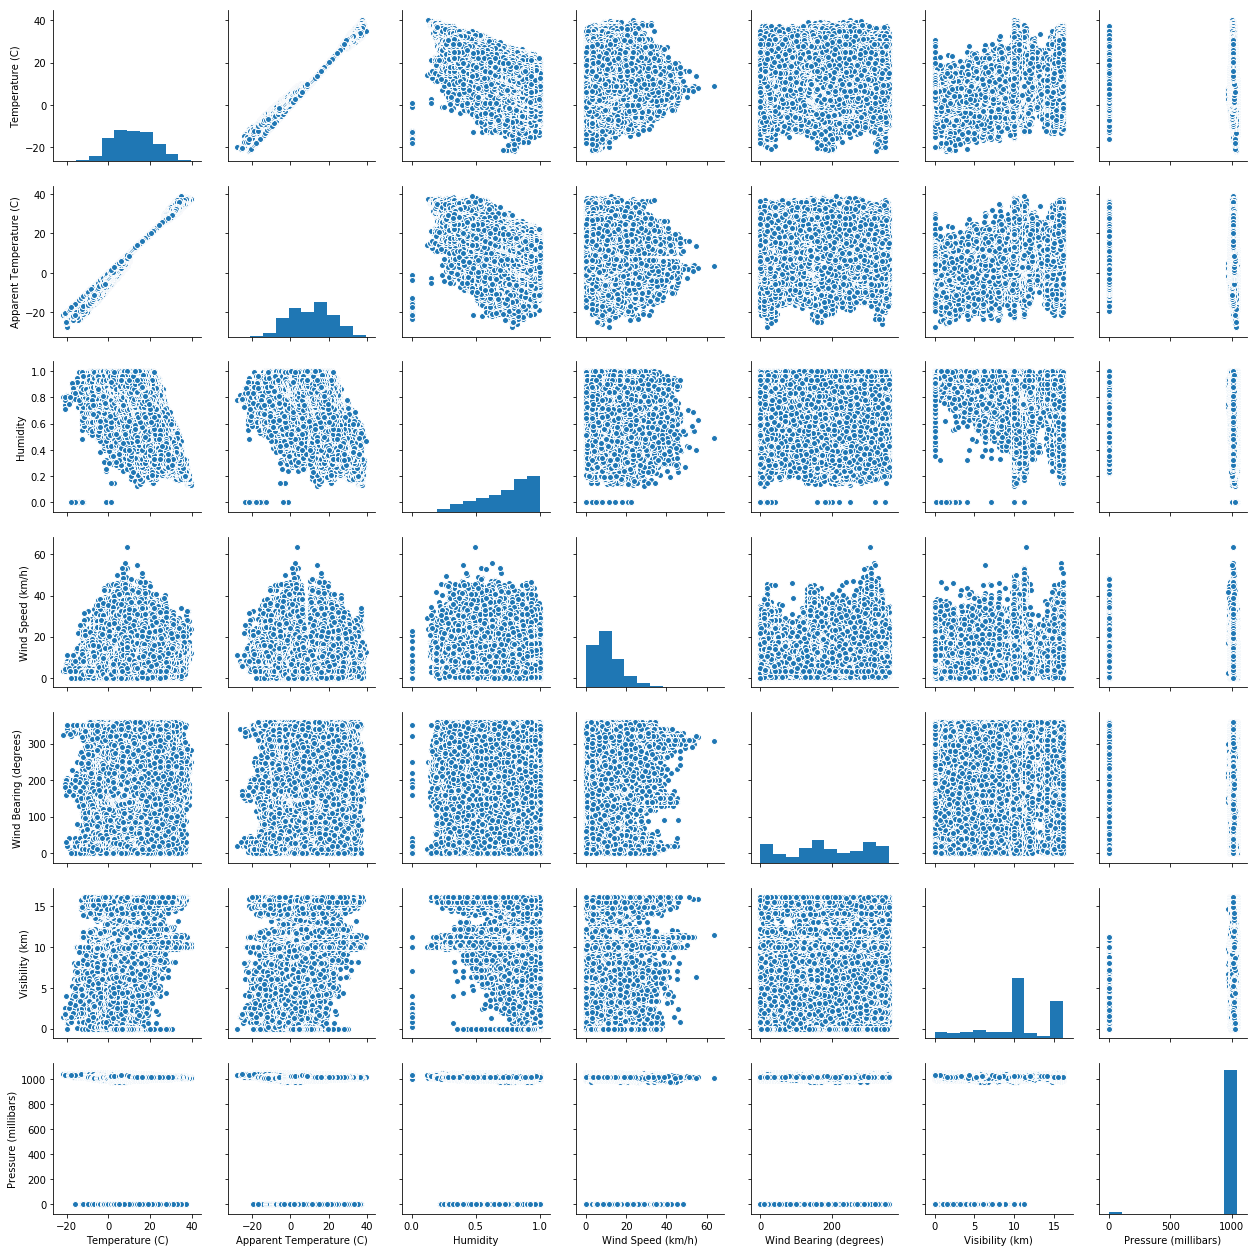

In [17]:
sns.pairplot(training_data) ## 由圖中可以大概看出，除了溫度與體感溫度有絕對正相關以外，其他Feature與體感溫度似乎都沒有太大的相關性。

____
# Split Training and Testing data & Scaling
____

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [19]:
X = training_data.drop(['Apparent Temperature (C)'], axis = 1)
y = training_data['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Training data number: ', len(X_train))
print('Testing data number: ', len(X_test))

Training data number:  67517
Testing data number:  28936


___
# Implement Regression model
___

### simple linear regression
____
做簡單線性回歸的預測，這裏使用與體感溫度有最高度相關的feature，也就是Temperature來預測

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


MSE:  1.705451052994054
簡單線性回歸參數： [1.11201623]
R-score:  0.9853815145384803


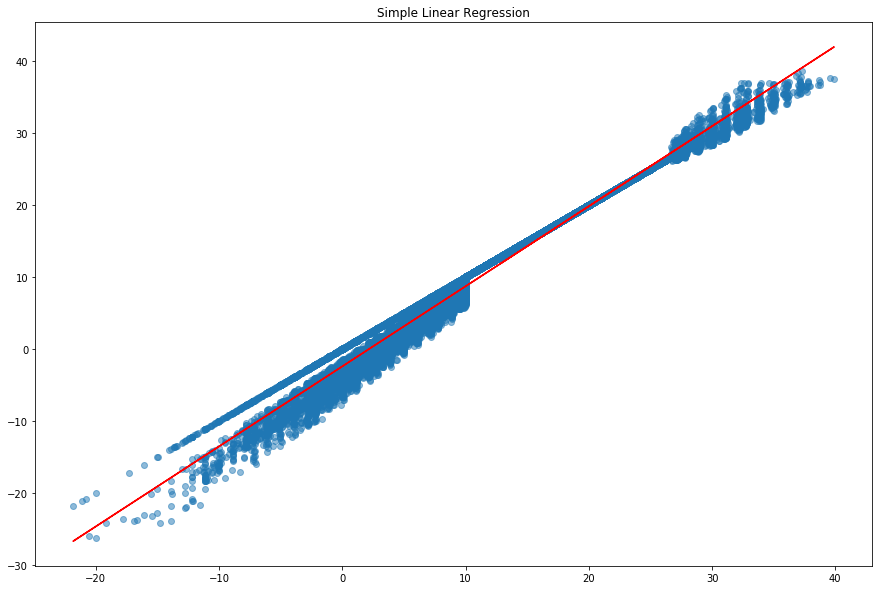

In [58]:
X_train_simple = X_train['Temperature (C)'].reshape(-1,1)
X_test_simple = X_test['Temperature (C)'].reshape(-1,1)
linear_simple = LinearRegression()
linear_simple.fit(X_train_simple, y_train)
predict_simple = linear_simple.predict(X_test_simple)

plt.figure(figsize=(15,10))
plt.title('Simple Linear Regression')
plt.scatter(X_test_simple, y_test, alpha = 0.5)
plt.plot(X_test_simple, predict_simple,color = 'red')
print("MSE: ", mean_squared_error(y_test, predict_simple))  ## mean square error

print('簡單線性回歸參數：',linear_simple.coef_)   ## 簡單線性回歸參數
print('R-score: ', linear_simple.score(X_train_simple, y_train))

#### multiple linear regression
____
import scikit套件 Linear Regression

5 methods of building model:
1. All-in
2. backward elimination (反向淘汰）
3. Forward selection （順向選擇）
4. bidiractional elimination（雙向淘汰）
5. score comparision（訊息量比較）

多元線性回歸相關的資源如下連結：
1. 資料科學從頭學(五) Linear Regression: [資料科學從頭學(五) Linear Regression](http://ericdataworld.blogspot.com/2017/07/linear-regression.html)


通常多元線性回歸可以通過上述步驟來篩選features，而本次選擇的資料集在多元線性回歸下看起來結果是相當適配的。

MSE:  1.185752250515069
多元線性回歸參數： [ 1.12627233e+00  1.06482912e+00 -9.54429984e-02  5.21629776e-04
 -1.28790269e-03  1.69003382e-04]
R score:  0.989918301690624


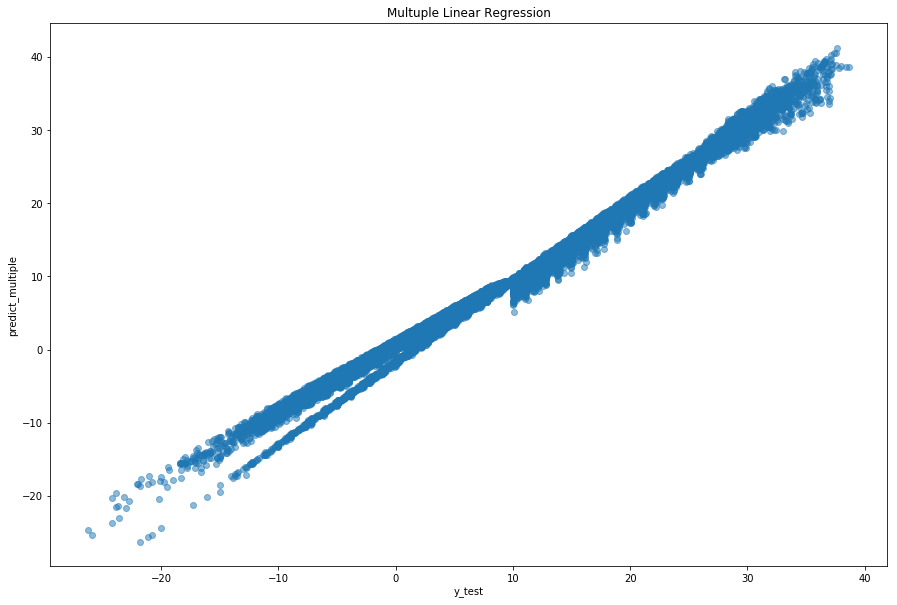

In [54]:
linear_mutiple = LinearRegression()
linear_mutiple.fit(X_train, y_train)
predict_multiple = linear_mutiple.predict(X_test)
plt.figure(figsize=(15,10))
plt.title('Multuple Linear Regression')
plt.scatter(y_test, predict_multiple, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('predict_multiple')
print("MSE: ", mean_squared_error(y_test, predict_multiple))  ## mean square error

print("多元線性回歸參數：", linear_mutiple.coef_)  ## 多元線性回歸參數
print("R score: ",linear_mutiple.score(X_train, y_train))